# Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn import datasets

# Making sure that all columns are visible
pd.set_option('display.max_columns', None)


# Import & QA the data

In [5]:
#1 Importing sheet "Account_Info"
df_account = pd.read_excel('../Bank_Customer_Churn/Data/Bank_Churn_Messy.xlsx',sheet_name ='Account_Info')

#1 Importing sheet "Customer_Info"
df_customer = pd.read_excel('../Bank_Customer_Churn/Data/Bank_Churn_Messy.xlsx',sheet_name ='Customer_Info')


In [6]:
df_account.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [7]:
df_customer.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [8]:
df_cust_details = (df_account.merge(df_customer,
               how='left',
               left_on='CustomerId',
               right_on='CustomerId'))

In [9]:
df_cust_details.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63


In [10]:
#Identify duplicate values
df_cust_details[df_cust_details.duplicated(keep=False)]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [11]:
#Remove duplicate columns and rows
df_copy = df_cust_details.drop(columns='Tenure_y').rename(columns={'Tenure_x': 'Tenure'}).drop_duplicates().copy()

In [12]:
df_copy.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,€93826.63
5,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,€79084.1


# Clean the data

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  object 
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          9997 non-null   object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              9997 non-null   float64
 12  EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [14]:
# Balance and EstimatedSalary need to be floats and we must remove the euro sign to do so
df_copy.Balance = df_copy.Balance.str.replace('€','').astype(float)
df_copy.EstimatedSalary =df_copy.EstimatedSalary.str.replace('€','').astype(float)

# HasCrCard, IsActiveMember and Gender  should be binary values
df_copy.HasCrCard = df_copy.HasCrCard.map({'Yes': 1, 'No': 0})
df_copy.IsActiveMember = df_copy.IsActiveMember.map({'Yes': 1, 'No': 0})
df_copy.Gender = df_copy.Gender.map({'Female': 1, 'Male': 0})

# Age should be INT and missing values will be replaced by the median
df_copy.Age = np.where(df_copy.Age.isna(),df_copy.Age.median(),df_copy.Age).astype(int)

# Surname will be replaced with 'MISSING'
df_copy.Surname = np.where(df_copy.Surname.isna(),'MISSING',df_copy.Surname)

In [15]:
df_copy.describe()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Gender,Age,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,76485.889288,1.530200,0.515100,5.012800,0.515100,0.203700,650.528800,0.454300,38.921500,99762.195289
std,7.193619e+04,62397.405202,0.581654,0.499797,2.892174,0.499797,0.402769,96.653299,0.497932,10.487552,60583.863580
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,0.000000,18.000000,-999999.000000
25%,1.562853e+07,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.000000,0.000000,32.000000,50910.677500
50%,1.569074e+07,97198.540000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,0.000000,37.000000,100191.725000
75%,1.575323e+07,127644.240000,2.000000,1.000000,7.000000,1.000000,0.000000,718.000000,1.000000,44.000000,149388.247500
max,1.581569e+07,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,1.000000,92.000000,199992.480000


In [16]:
# The only value that does not make sense is a negative EstimatedSalary. We will attribute people with a negative summary to the median salary
df_copy.EstimatedSalary = np.where(df_copy.EstimatedSalary<0,df_copy.EstimatedSalary.median(),df_copy.EstimatedSalary)


In [17]:
df_copy.Geography.value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [18]:
df_copy

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,1,2,1,1,Hargrave,619,FRA,1,42,101348.88
2,15647311,83807.86,1,1,1,1,0,Hill,608,Spain,1,41,112542.58
3,15619304,159660.80,3,0,8,0,1,Onio,502,French,1,42,113931.57
4,15701354,0.00,2,0,1,0,0,Boni,699,FRA,1,39,93826.63
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,Spain,1,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,France,0,39,96270.64
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,French,0,35,101699.77
9998,15584532,0.00,1,1,7,1,1,Liu,709,FRA,1,36,42085.58
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,Germany,0,42,92888.52


In [19]:
#Making sure that France, French and FRA are under the same country name France
df_copy.Geography = np.where(df_copy.Geography.isin(['French','FRA','France']),'France',df_copy.Geography)

<Axes: xlabel='Exited'>

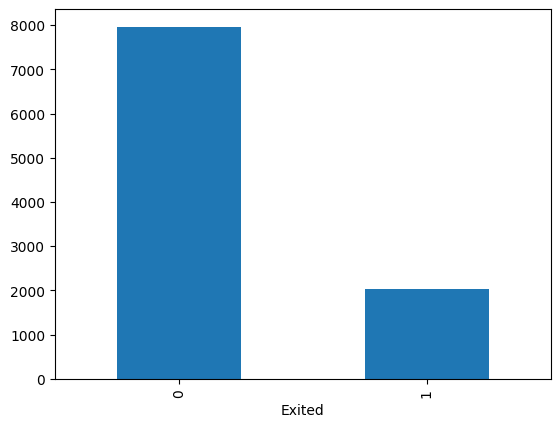

In [20]:
# Visualize the churn through the raw counts
df_copy.Exited.value_counts().plot.bar()

<Axes: xlabel='Exited'>

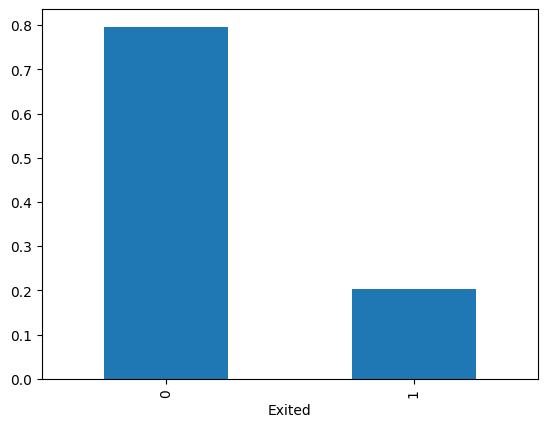

In [21]:
# Visualize the churn through the relative frequency
df_copy.Exited.value_counts(normalize=True).plot.bar()

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  float64
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   IsActiveMember   10000 non-null  int64  
 6   Exited           10000 non-null  int64  
 7   Surname          10000 non-null  object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  int64  
 11  Age              10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(9), object(2)
memory usage: 1.1+ MB


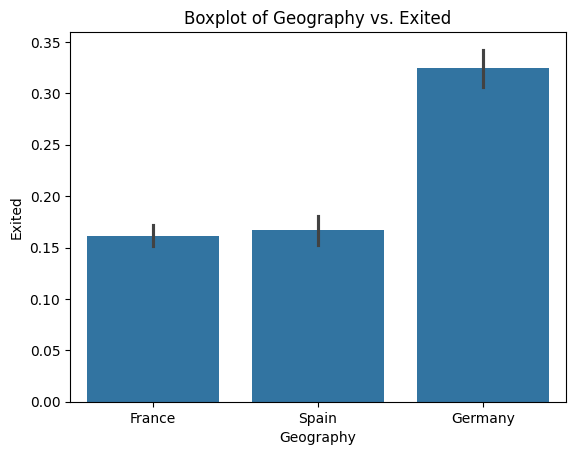

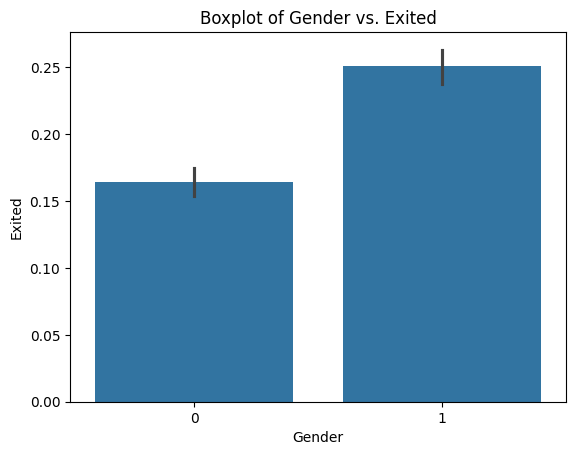

In [23]:
# List of columns you want to plot a bar chart
columns = ['Geography','Gender']

# Loop through each column and create a bar plot
for col in columns:
    sns.barplot(data=df_copy, x=col, y='Exited')
    plt.title(f'Boxplot of {col} vs. Exited')
    plt.show()

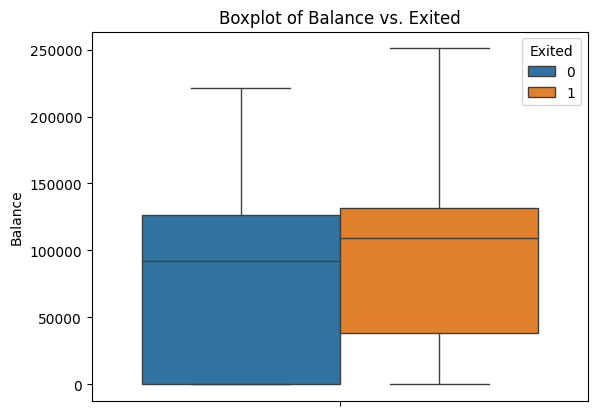

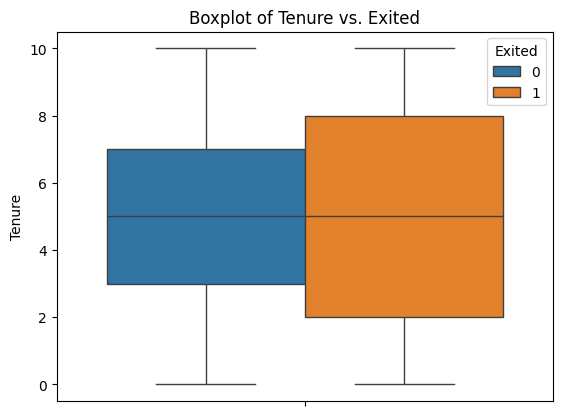

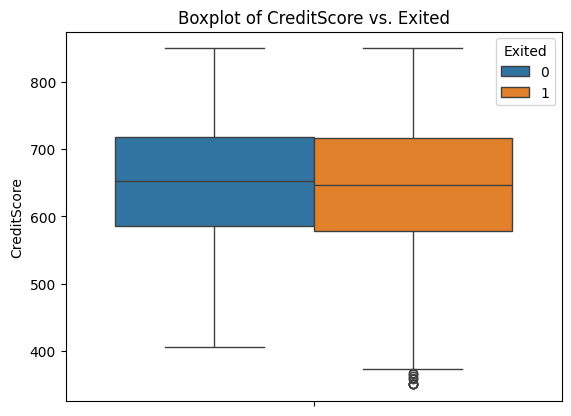

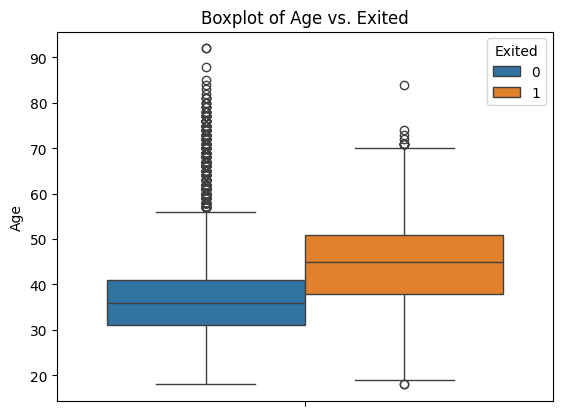

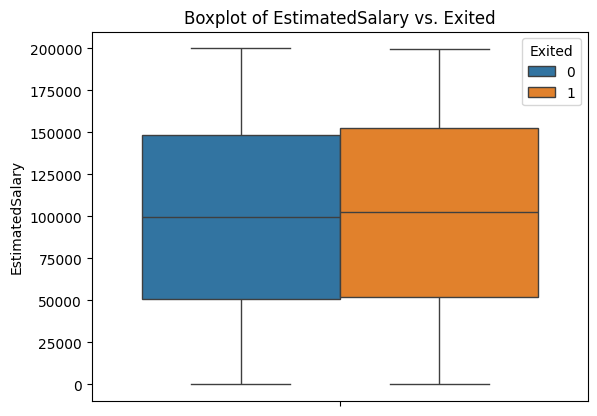

In [24]:
columns_to_drop = ["CustomerId","NumOfProducts","HasCrCard","Exited","Gender","IsActiveMember"]

for col in df_copy.drop(columns=columns_to_drop, axis=1).select_dtypes("number"):
    sns.boxplot(data=df_copy, y=col, hue="Exited")
    plt.title(f'Boxplot of {col} vs. Exited')
    plt.show()

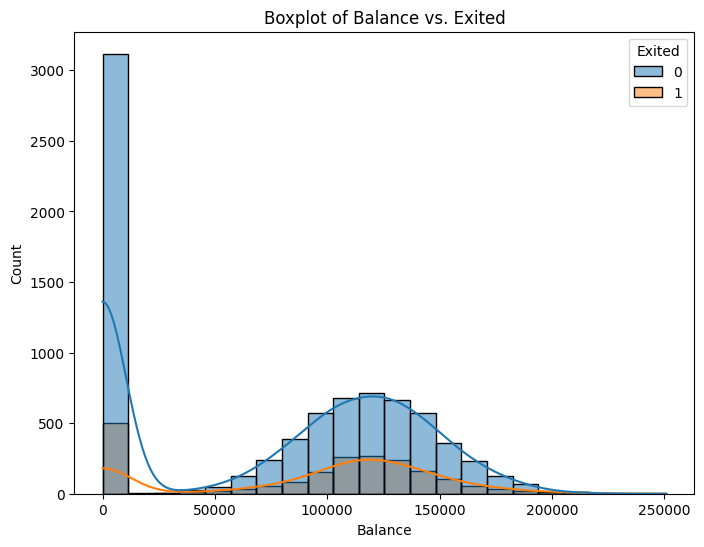

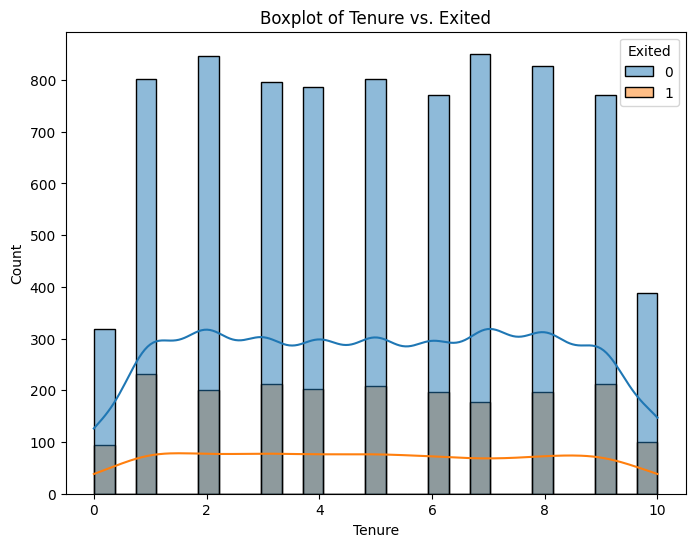

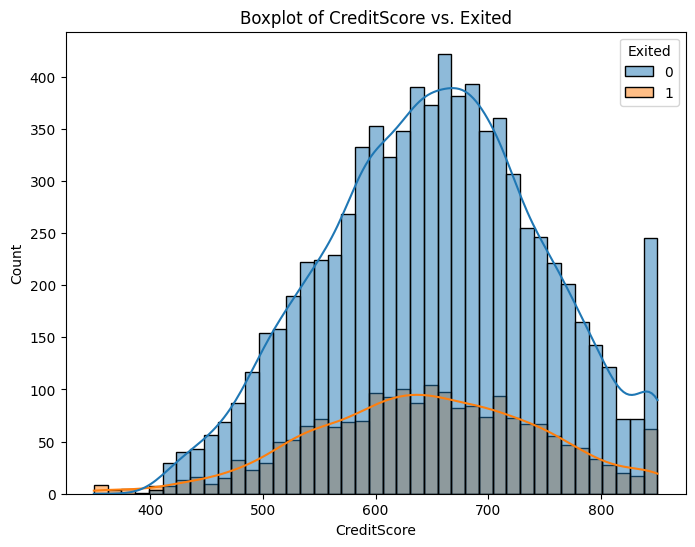

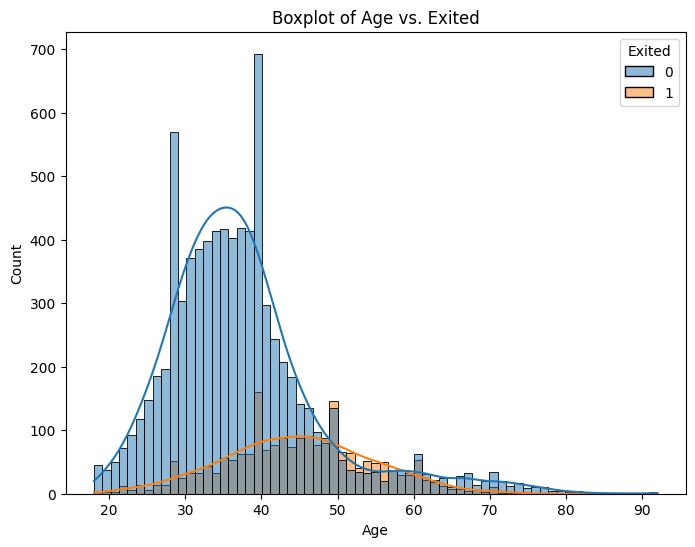

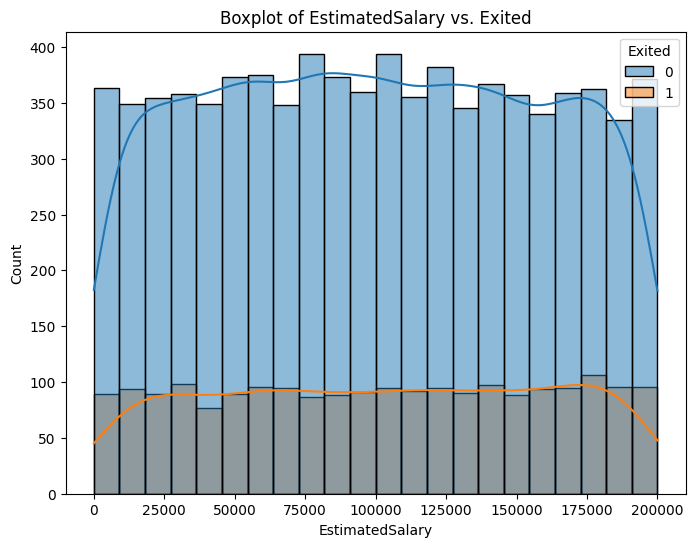

In [25]:
#View the distribution of data through a histogram
columns_to_drop = ["CustomerId","NumOfProducts","HasCrCard","Exited","Gender","IsActiveMember"]

for col in df_copy.drop(columns=columns_to_drop, axis=1).select_dtypes("number"):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_copy, x=col, hue="Exited",kde=True)
    plt.title(f'Boxplot of {col} vs. Exited')
    plt.show()

# Prepare the data for modeling

In [26]:
# Create a dummy variable for Geography

#STEP 1 GET DUMMIES
df_geography = pd.get_dummies(df_copy.Geography).astype(int)

#STEP 2 APPEND DATA with the table that contains the dummies
df_copy = pd.concat([df_copy,df_geography], axis=1)


In [27]:
df_copy

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,France,Germany,Spain
0,15634602,0.00,1,1,2,1,1,Hargrave,619,France,1,42,101348.88,1,0,0
2,15647311,83807.86,1,1,1,1,0,Hill,608,Spain,1,41,112542.58,0,0,1
3,15619304,159660.80,3,0,8,0,1,Onio,502,France,1,42,113931.57,1,0,0
4,15701354,0.00,2,0,1,0,0,Boni,699,France,1,39,93826.63,1,0,0
5,15737888,125510.82,1,1,2,1,0,Mitchell,850,Spain,1,43,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,0.00,2,0,5,0,0,Obijiaku,771,France,0,39,96270.64,1,0,0
9997,15569892,57369.61,1,1,10,1,0,Johnstone,516,France,0,35,101699.77,1,0,0
9998,15584532,0.00,1,1,7,1,1,Liu,709,France,1,36,42085.58,1,0,0
9999,15682355,75075.31,2,0,3,0,1,Sabbatini,772,Germany,0,42,92888.52,0,1,0


In [28]:
#Determine which column to keep for the model
#I dropped CustomerID, Surname and Geography as it is not needed for the model
df_modelling = df_copy.drop(['CustomerId','Surname','Geography'],axis=1)

In [29]:
df_modelling 

,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Gender,Age,EstimatedSalary,France,Germany,Spain
0,0.00,1,1,2,1,1,619,1,42,101348.88,1,0,0
2,83807.86,1,1,1,1,0,608,1,41,112542.58,0,0,1
3,159660.80,3,0,8,0,1,502,1,42,113931.57,1,0,0
4,0.00,2,0,1,0,0,699,1,39,93826.63,1,0,0
5,125510.82,1,1,2,1,0,850,1,43,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.00,2,0,5,0,0,771,0,39,96270.64,1,0,0
9997,57369.61,1,1,10,1,0,516,0,35,101699.77,1,0,0
9998,0.00,1,1,7,1,1,709,1,36,42085.58,1,0,0
9999,75075.31,2,0,3,0,1,772,0,42,92888.52,0,1,0


In [30]:
# Add a balance_versus_Income feature, which divides customer's bank balance by their estimated salary

df_modelling['balance_v_Income']= round(df_modelling.Balance/df_modelling.EstimatedSalary,2)

In [31]:
df_modelling

,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Gender,Age,EstimatedSalary,France,Germany,Spain,balance_v_Income
0,0.00,1,1,2,1,1,619,1,42,101348.88,1,0,0,0.00
2,83807.86,1,1,1,1,0,608,1,41,112542.58,0,0,1,0.74
3,159660.80,3,0,8,0,1,502,1,42,113931.57,1,0,0,1.40
4,0.00,2,0,1,0,0,699,1,39,93826.63,1,0,0,0.00
5,125510.82,1,1,2,1,0,850,1,43,79084.10,0,0,1,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.00,2,0,5,0,0,771,0,39,96270.64,1,0,0,0.00
9997,57369.61,1,1,10,1,0,516,0,35,101699.77,1,0,0,0.56
9998,0.00,1,1,7,1,1,709,1,36,42085.58,1,0,0,0.00
9999,75075.31,2,0,3,0,1,772,0,42,92888.52,0,1,0,0.81


<Axes: ylabel='balance_v_Income'>

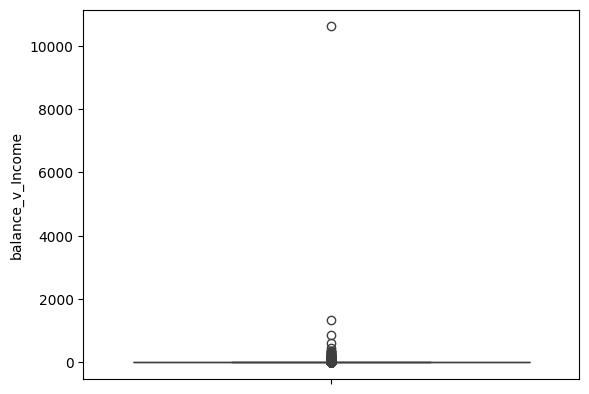

In [32]:
# List of columns you want to plot a bar chart
sns.boxplot(data=df_modelling, y="balance_v_Income")

In [33]:
#We can observe that there are outliers for balance_v_Income
df_modelling.describe()


,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Gender,Age,EstimatedSalary,France,Germany,Spain,balance_v_Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,0.515100,5.012800,0.515100,0.203700,650.528800,0.454300,38.921500,100092.252506,0.501400,0.250900,0.247700,3.878711
std,62397.405202,0.581654,0.499797,2.892174,0.499797,0.402769,96.653299,0.497932,10.487552,57510.146401,0.500023,0.433553,0.431698,108.337297
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,350.000000,0.000000,18.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,584.000000,0.000000,32.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,97198.540000,1.000000,1.000000,5.000000,1.000000,0.000000,652.000000,0.000000,37.000000,100196.062500,1.000000,0.000000,0.000000,0.750000
75%,127644.240000,2.000000,1.000000,7.000000,1.000000,0.000000,718.000000,1.000000,44.000000,149388.247500,1.000000,1.000000,0.000000,1.510000
max,250898.090000,4.000000,1.000000,10.000000,1.000000,1.000000,850.000000,1.000000,92.000000,199992.480000,1.000000,1.000000,1.000000,10614.660000


<Axes: ylabel='balance_v_Income'>

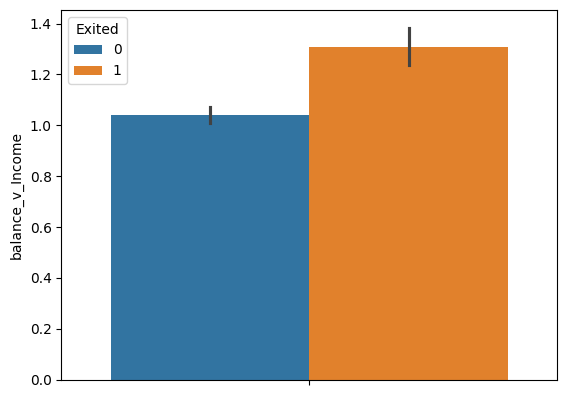

In [34]:
sns.barplot(data=df_modelling.query("balance_v_Income<10"), y="balance_v_Income", hue="Exited")

In [36]:
#Saving it as a pickle file (allow for quick load in the future)
df_modelling.to_pickle("df_modelling_copy.pkl")
